Donna Burwell 04 Apr 2025

# Example Dashboard

## Filled Polygon
> fill() draws a filled polygon based on lists of point coordinates x, y.

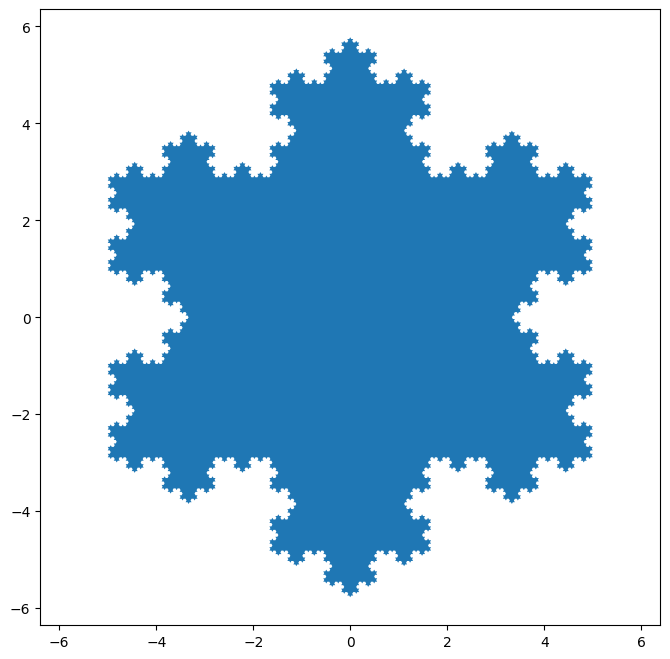

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

## LineCollection
>Matplotlib can efficiently draw multiple lines at once using a LineCollection.

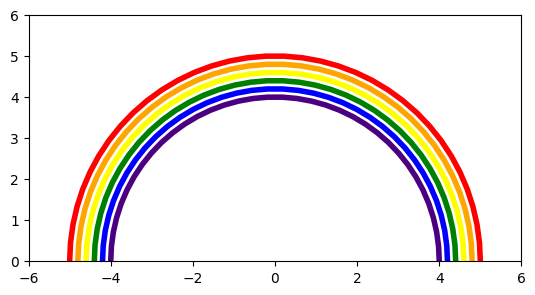

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection

colors = ["indigo", "blue", "green", "yellow", "orange", "red"]

# create a list of half-circles with varying radii
theta = np.linspace(0, np.pi, 36)
radii = np.linspace(4, 5, num=len(colors))
arcs = [np.column_stack([r * np.cos(theta), r * np.sin(theta)]) for r in radii]

fig, ax = plt.subplots(figsize=(6.4, 3.2))
# set axes limits manually because Collections do not take part in autoscaling
ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)
ax.set_aspect("equal")  # to make the arcs look circular

# create a LineCollection with the half-circles
# its properties can be set per line by passing a sequence (here used for *colors*)
# or they can be set for all lines by passing a scalar (here used for *linewidths*)
line_collection = LineCollection(arcs, colors=colors, linewidths=4)
ax.add_collection(line_collection)

plt.show()

## Bihistogram
>To generate a bihistogram we need two datasets (each being a vector of numbers). 

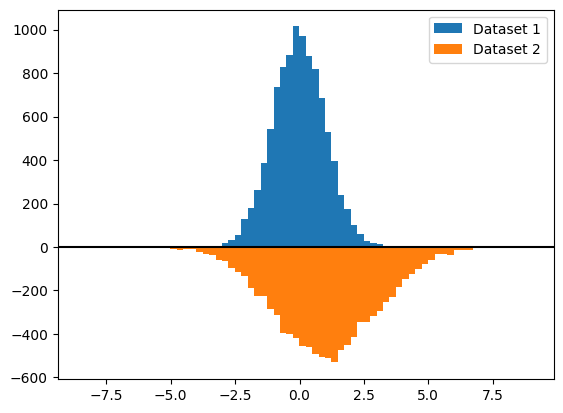

In [4]:
N_points = 10_000

# Generate two normal distributions
dataset1 = np.random.normal(0, 1, size=N_points)
dataset2 = np.random.normal(1, 2, size=N_points)

# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 0.25
bins = np.arange(np.min([dataset1, dataset2]),
                    np.max([dataset1, dataset2]) + bin_width, bin_width)

fig, ax = plt.subplots()

# Plot the first histogram
ax.hist(dataset1, bins=bins, label="Dataset 1")

# Plot the second histogram
# (notice the negative weights, which flip the histogram upside down)
ax.hist(dataset2, weights=-np.ones_like(dataset2), bins=bins, label="Dataset 2")
ax.axhline(0, color="k")
ax.legend()

plt.show()